# There is a theory says that: cumulative net value of fund of same cateory will eventually be almost same. let's verify if it's true 

In [1]:
%matplotlib inline
import sqlite3
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
db_conn = sqlite3.connect(r"../crawler/FundProject.db")
db_cursor = db_conn.cursor()

## Summarize fund category

In [3]:
db_cursor.execute("SELECT fund_cate FROM FundBasicInfo")

In [4]:
fund_cate = db_cursor.fetchall()

In [5]:
len(fund_cate)

4881

In [6]:
fund_cate_set = set(fund_cate)

### Create dictionary to summarize category of dund

In [7]:
fund_cate_dict = {}

In [8]:
for i in fund_cate:
    if i in fund_cate_dict.keys():
        fund_cate_dict[i] += 1
    else:
        fund_cate_dict[i] = 1

In [9]:
fund_cate_dict

{('QDII',): 135,
 ('QDII-指数',): 55,
 ('债券型',): 1230,
 ('债券指数',): 39,
 ('分级杠杆',): 17,
 ('固定收益',): 18,
 ('定开债券',): 377,
 ('混合型',): 2368,
 ('联接基金',): 101,
 ('股票型',): 211,
 ('股票指数',): 329,
 ('货币型',): 1}

### plot cumulative net value of days

#### 股票型

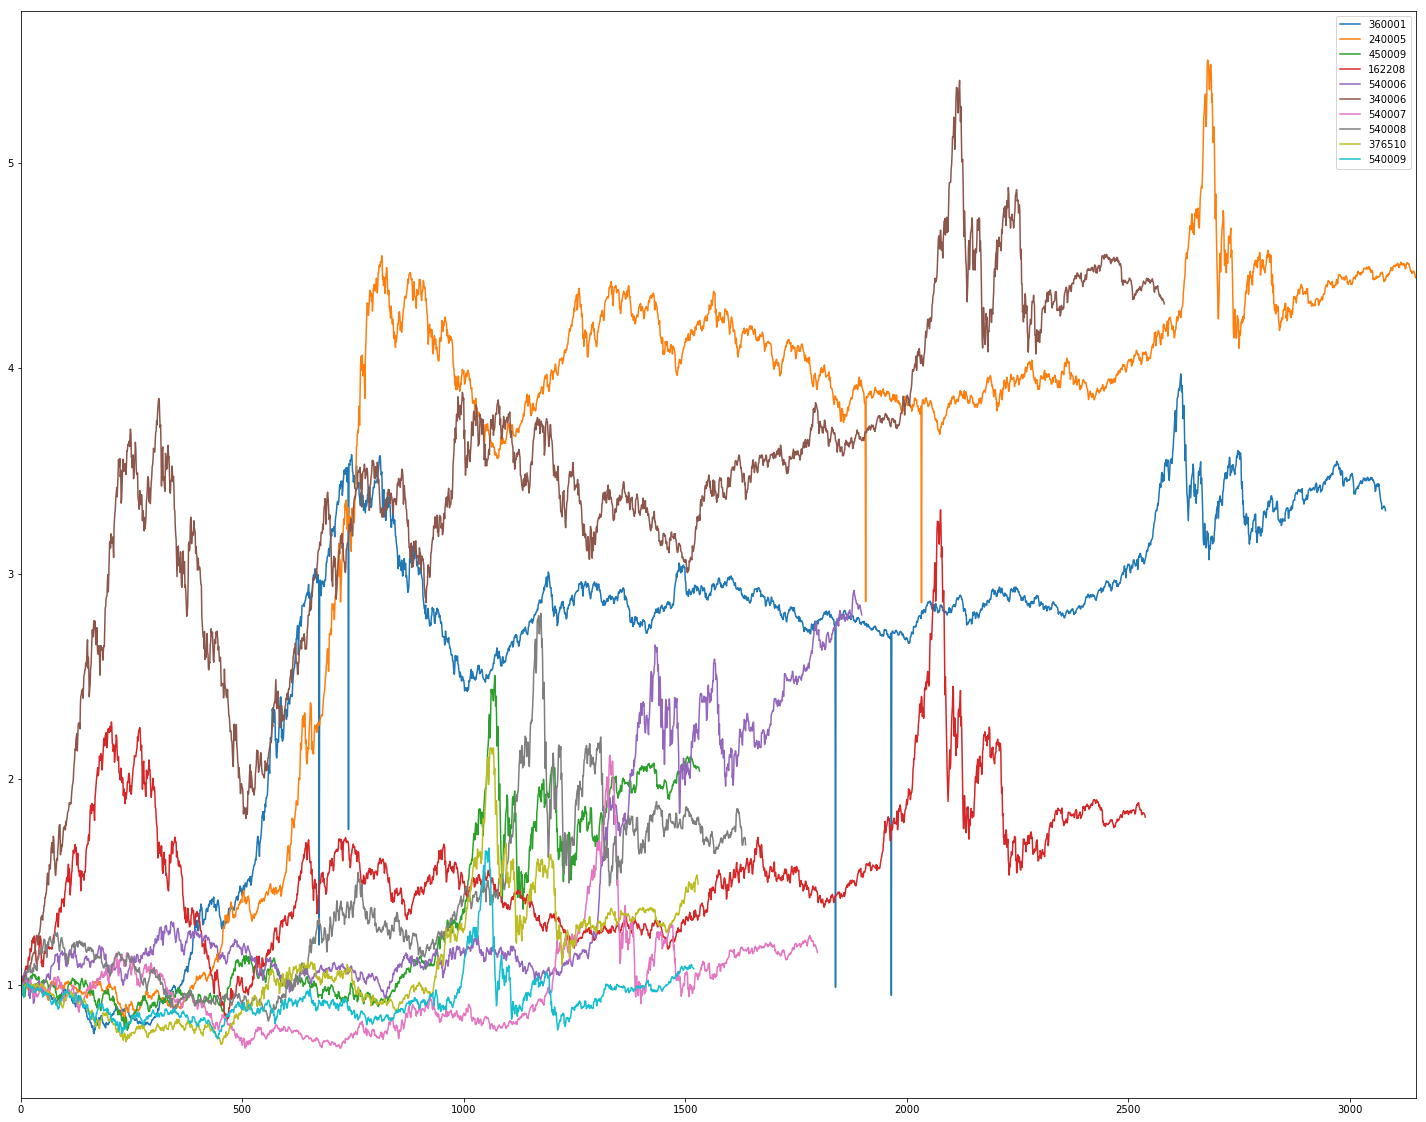

In [10]:
db_cursor.execute("SELECT fund_id FROM FundBasicinfo WHERE fund_cate='股票型' ")
stock_fund_id = db_cursor.fetchall()
stock_fund_netvalue = DataFrame()
MIN_DAYS_OF_FUND = 1500

for fund_id in stock_fund_id:
    table_name = "FundNetValue{0}".format(fund_id[0])
    temp_df = pd.read_sql("SELECT CumNetValue FROM {0}".format(table_name),db_conn)
    if(len(temp_df.index)<MIN_DAYS_OF_FUND):
        continue
    temp_df.columns = [fund_id[0]]
    stock_fund_netvalue=pd.concat([stock_fund_netvalue,temp_df],axis=1)
    
mpl.rcParams['figure.figsize']=(25,20)
stock_fund_netvalue.plot()

#### QDII

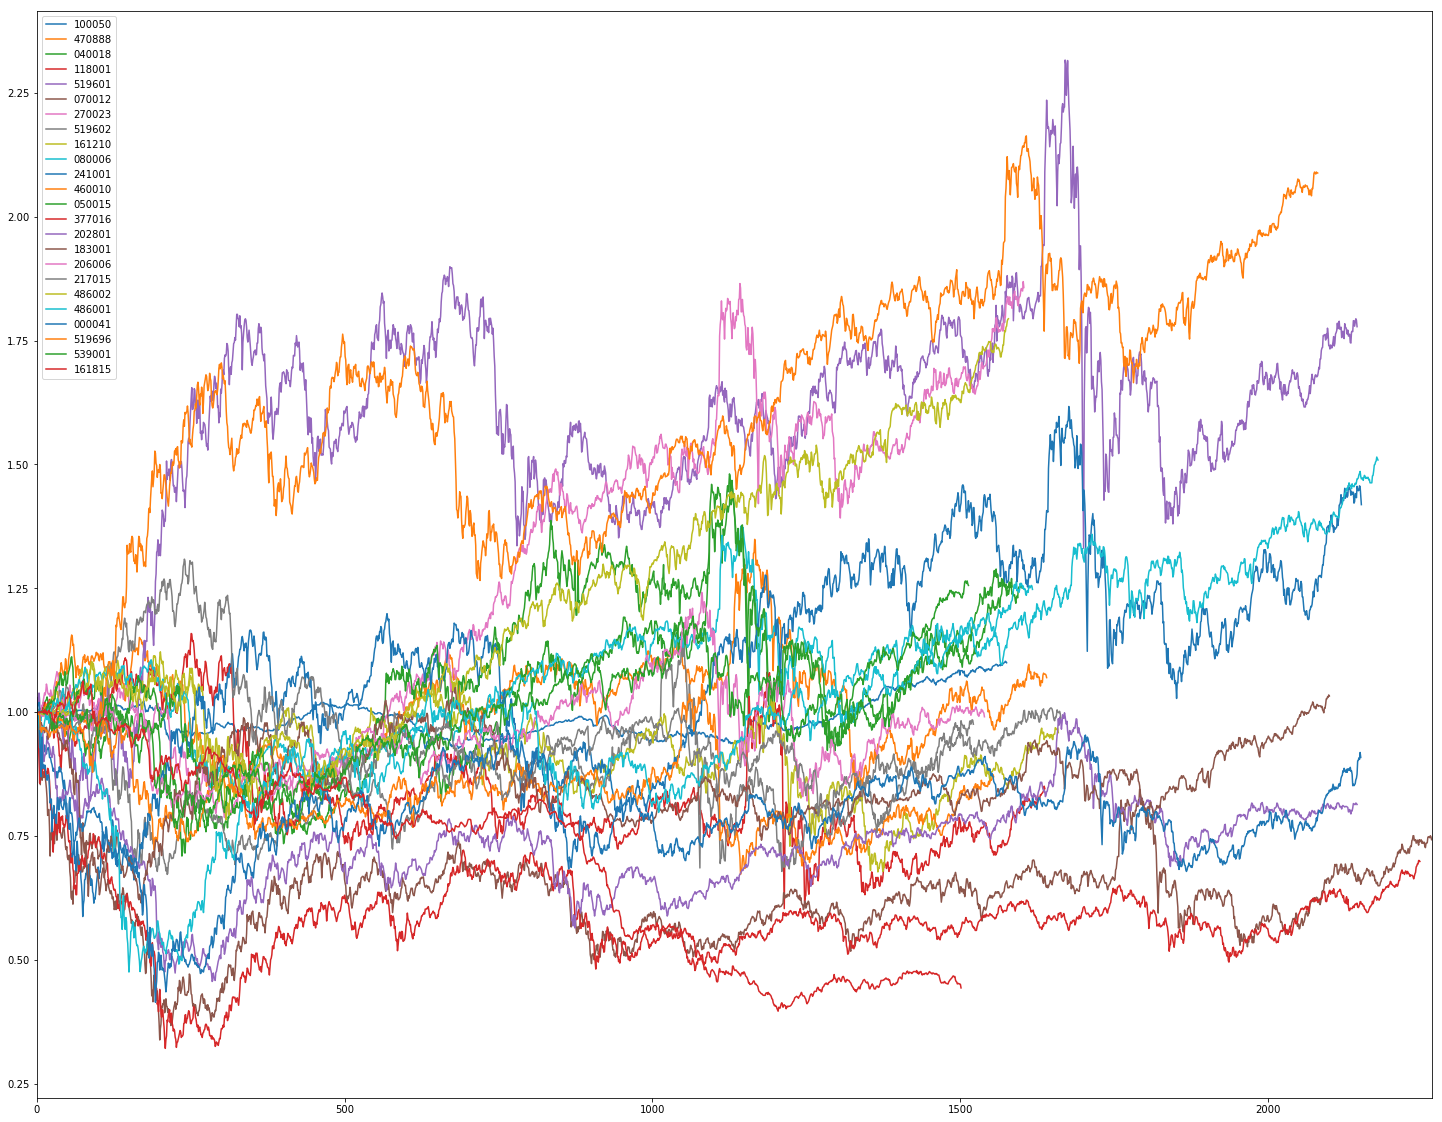

In [11]:
db_cursor.execute("SELECT fund_id FROM FundBasicinfo WHERE fund_cate='QDII' ")
stock_fund_id = db_cursor.fetchall()
stock_fund_netvalue = DataFrame()
MIN_DAYS_OF_FUND = 1500

for fund_id in stock_fund_id:
    table_name = "FundNetValue{0}".format(fund_id[0])
    try:
        temp_df = pd.read_sql("SELECT CumNetValue FROM {0}".format(table_name),db_conn)
    except:
        continue
    if(len(temp_df.index)<MIN_DAYS_OF_FUND):
        continue
    temp_df.columns = [fund_id[0]]
    stock_fund_netvalue=pd.concat([stock_fund_netvalue,temp_df],axis=1)
    
mpl.rcParams['figure.figsize']=(25,20)
stock_fund_netvalue.plot()

####  债券型

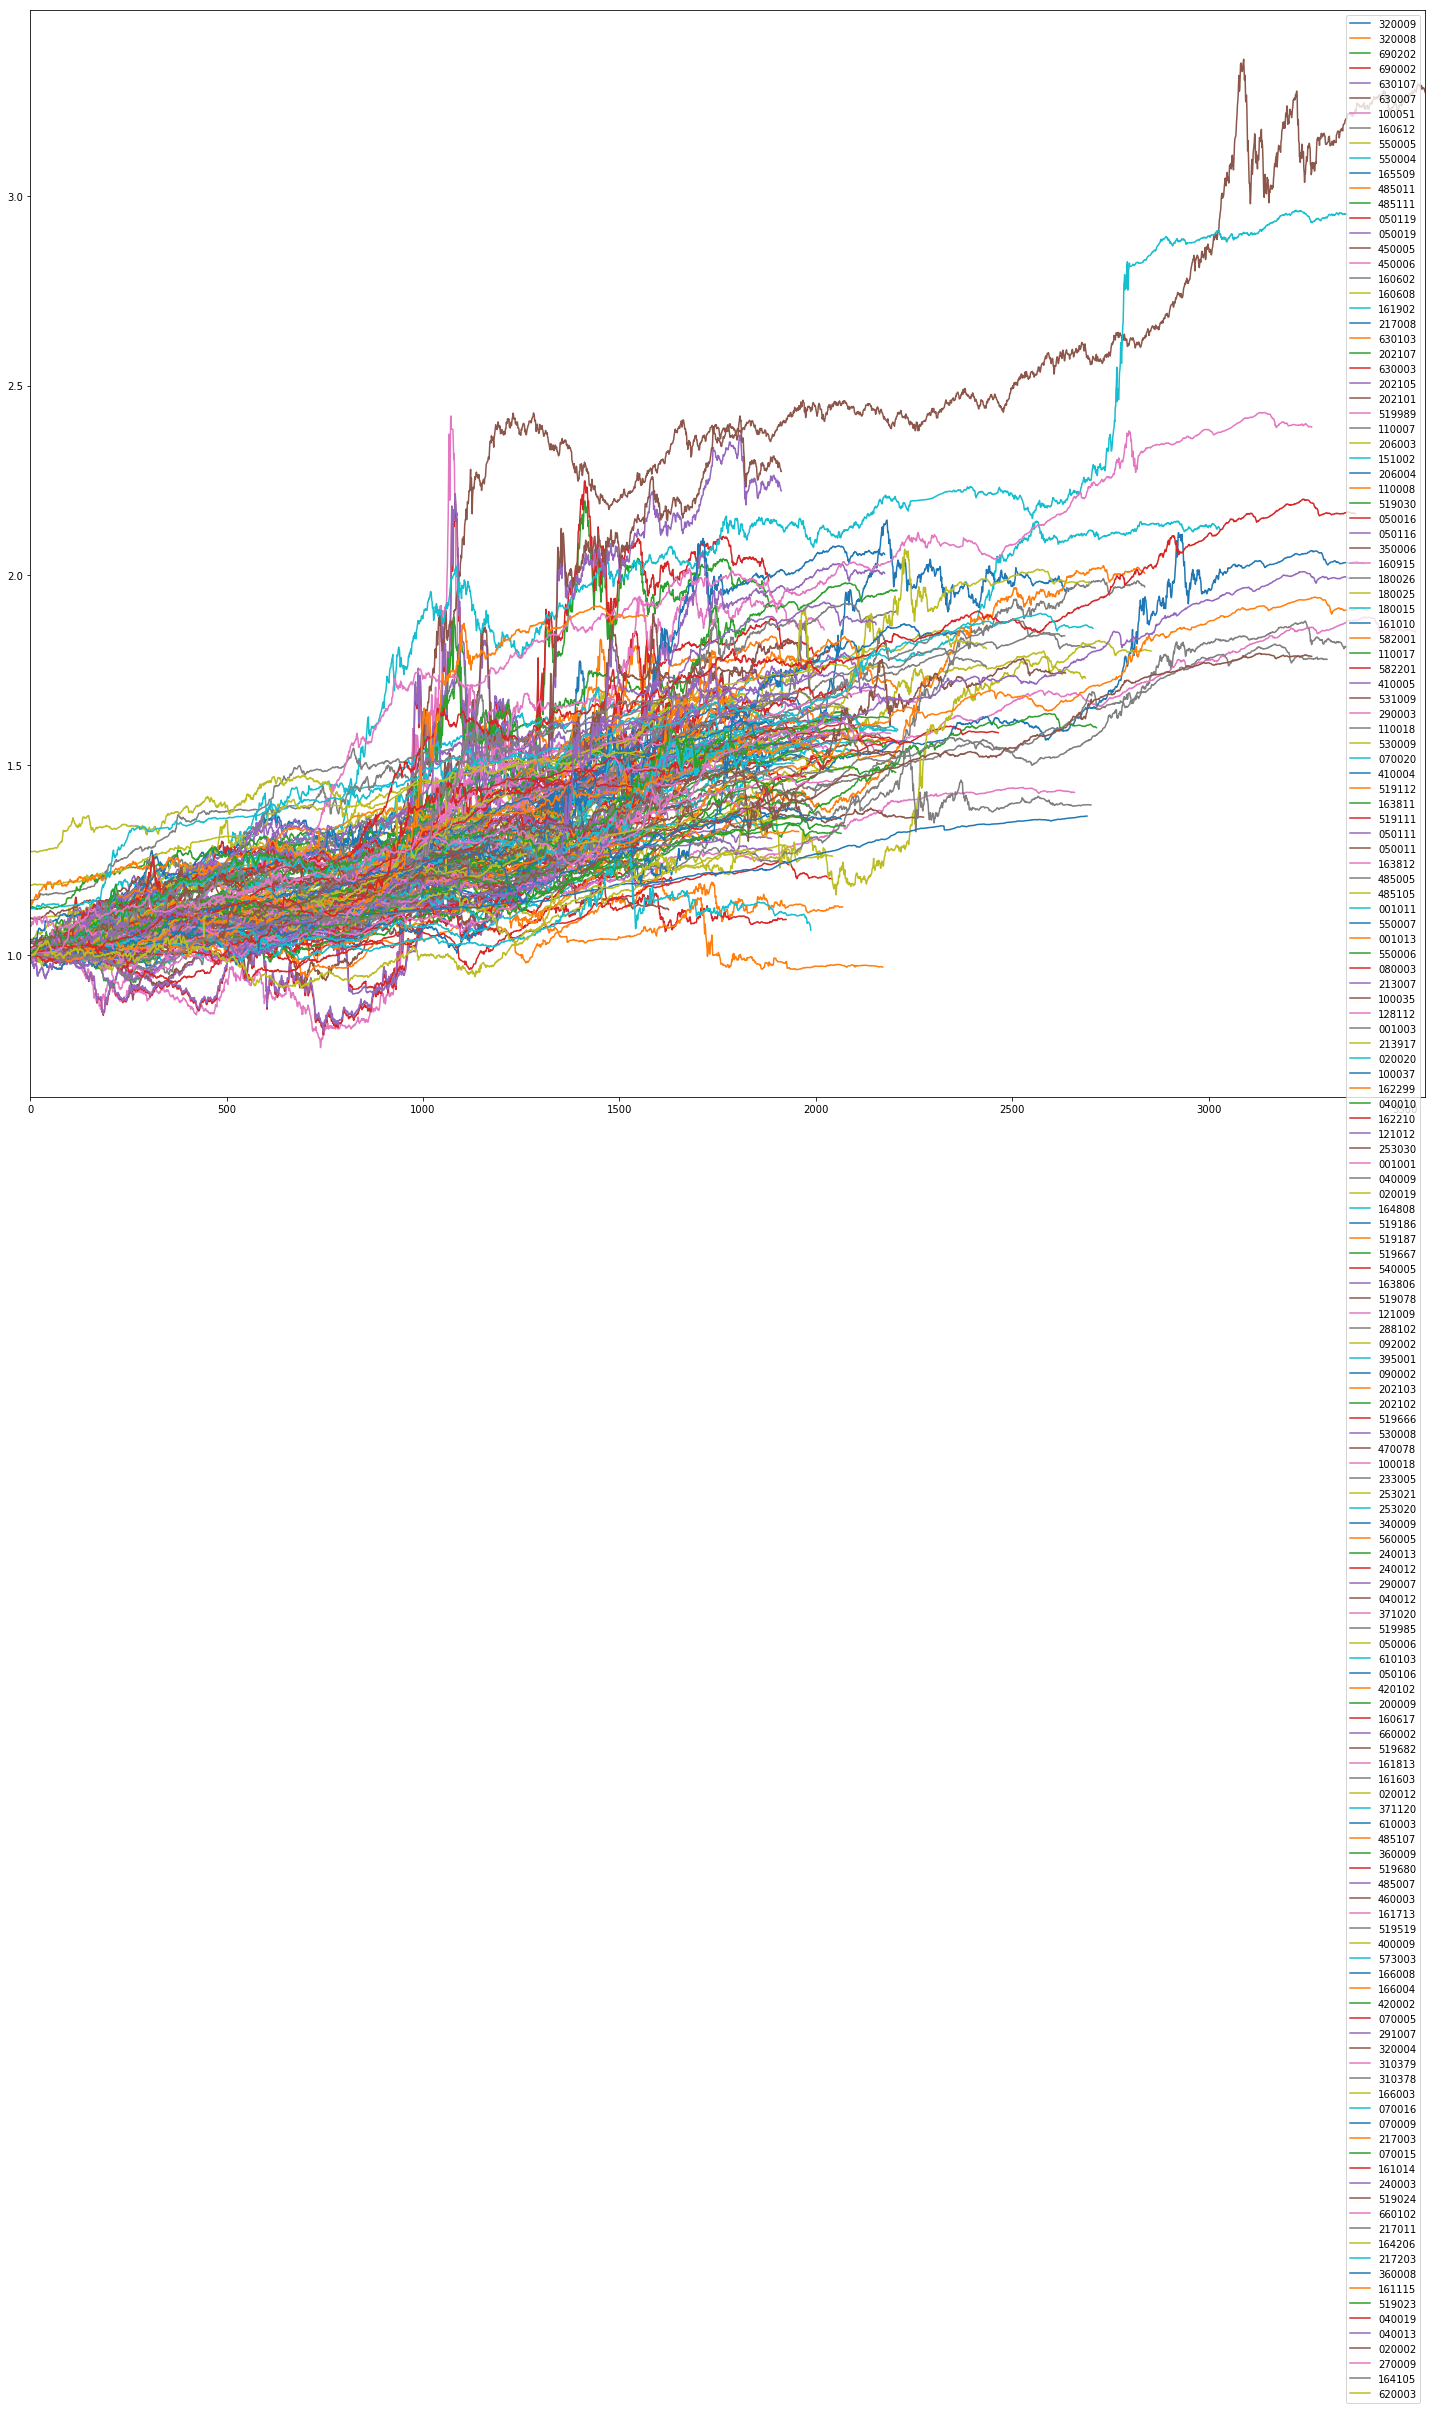

In [12]:
db_cursor.execute("SELECT fund_id FROM FundBasicinfo WHERE fund_cate='债券型' ")
stock_fund_id = db_cursor.fetchall()
stock_fund_netvalue = DataFrame()
MIN_DAYS_OF_FUND = 1500

for fund_id in stock_fund_id:
    table_name = "FundNetValue{0}".format(fund_id[0])
    try:
        temp_df = pd.read_sql("SELECT CumNetValue FROM {0}".format(table_name),db_conn)
    except:
        continue
    if(len(temp_df.index)<MIN_DAYS_OF_FUND):
        continue
    temp_df.columns = [fund_id[0]]
    stock_fund_netvalue=pd.concat([stock_fund_netvalue,temp_df],axis=1)
    
mpl.rcParams['figure.figsize']=(25,20)
stock_fund_netvalue.plot()

#### 混合型 3000 days

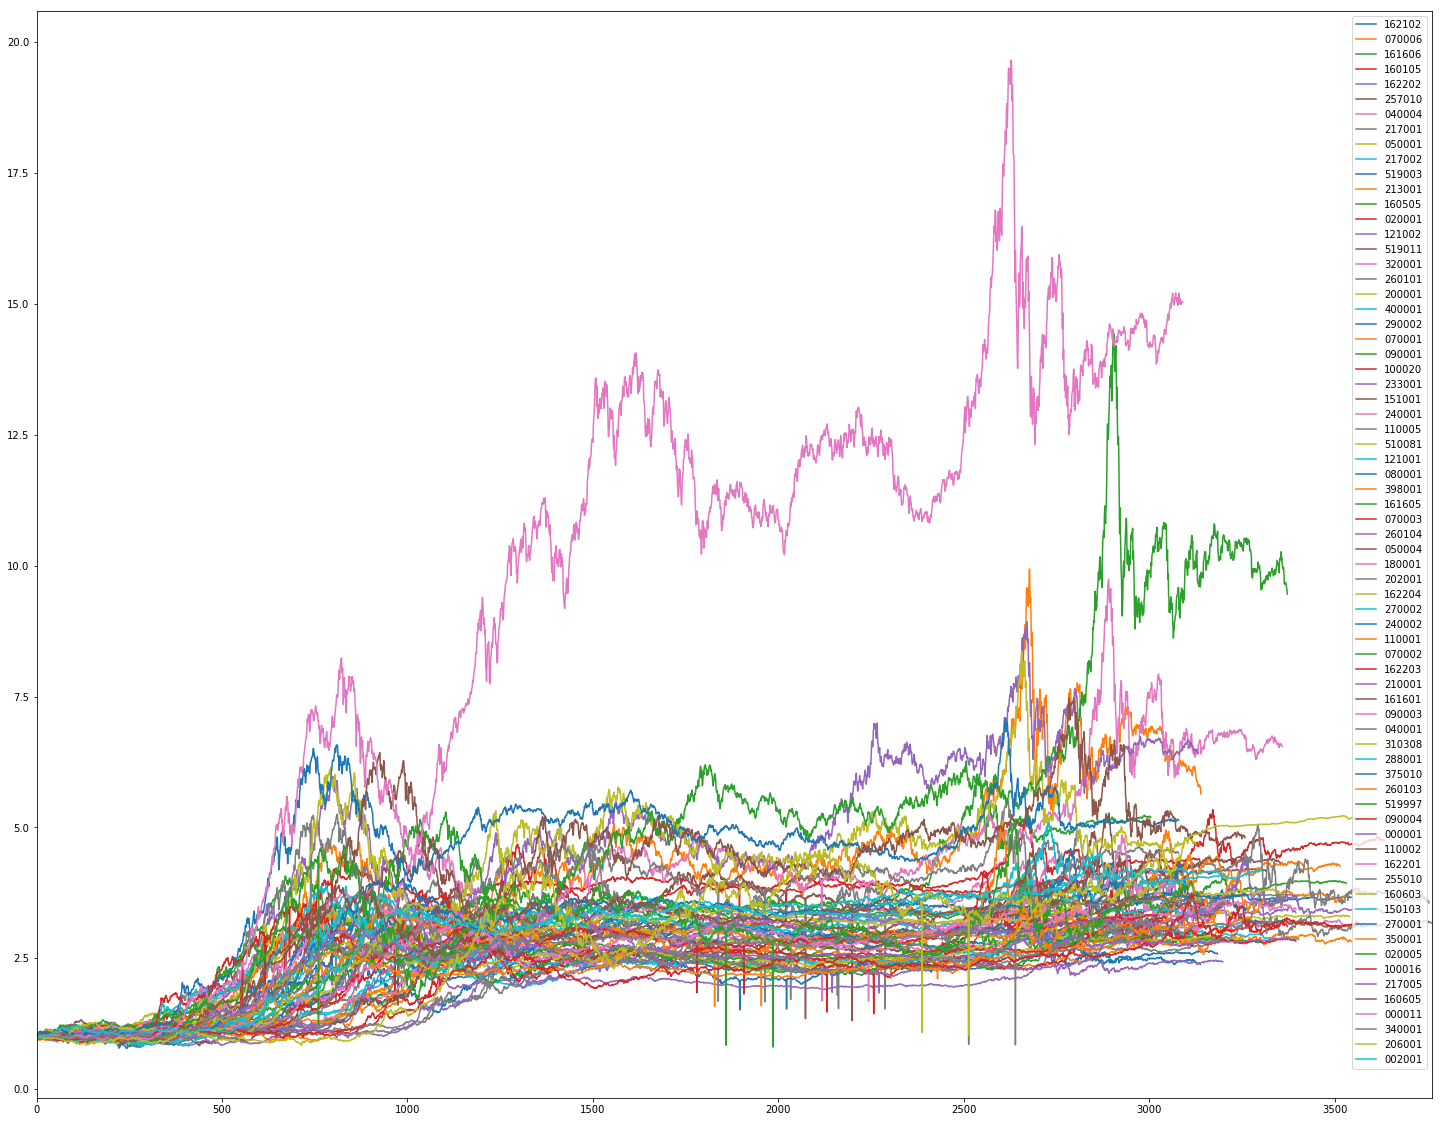

In [13]:
db_cursor.execute("SELECT fund_id FROM FundBasicinfo WHERE fund_cate='混合型' ")
stock_fund_id = db_cursor.fetchall()
stock_fund_netvalue = DataFrame()
MIN_DAYS_OF_FUND = 3000  # 2500

for fund_id in stock_fund_id:
    table_name = "FundNetValue{0}".format(fund_id[0])
    try:
        temp_df = pd.read_sql("SELECT CumNetValue FROM {0}".format(table_name),db_conn)
    except:
        continue
    if(len(temp_df.index)<MIN_DAYS_OF_FUND):
        continue
    temp_df.columns = [fund_id[0]]
    stock_fund_netvalue=pd.concat([stock_fund_netvalue,temp_df],axis=1)
    
mpl.rcParams['figure.figsize']=(25,20)
stock_fund_netvalue.plot()

## summary

* "股票型" is very unstable 
* "QDII" is highest risk, almost half of them is losing money
* "债券型": risk is low, but profit is aslo very low, most of them only incresing 1.5 times in 10 year.
* "混合型": is most balanced, cumulative net value will be 2.5 times after 10 yesrs. almost no one is losing money.